## 이번 모듈에서 다루는 내용

- Logistic Regression

## 선형 모델을 사용한 분류
- 예측 결과가 '+' 인지 '-' 인지를 보고 이진 분류를 하는데 선형모델이 자주 사용된다

$ y - (WX+b) > 0$

$ y - (WX+b) < 0$

- 선형회귀 모델, 서포트벡터 머신, 로지스틱회귀 모델 등이 사용된다.
- 로지스틱 리그레션은 원래 숫자를 예측하는 "회귀" 알고리즘이 아니라 분류 알고리즘이다

- 로지스틱회귀, SVC 두가지 모델에 대해 성능을 비교해보겠다.
- 결정경계를 나타내는 직선을 표시했다
- 규제를 하는 정도 (C 값)에 따라서 C 값이 크면 규제가 약하고, C 값이 작으면 규제가 크다. 규제가 작다는 것의 의미는 가능한 훈련데이터에 맞게 학습을 하라는 뜻이다. 규제가 클수록 일반화를 더 중요시 하는 것이다

In [14]:
%matplotlib inline
from preamble import *
from mglearn import *

C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


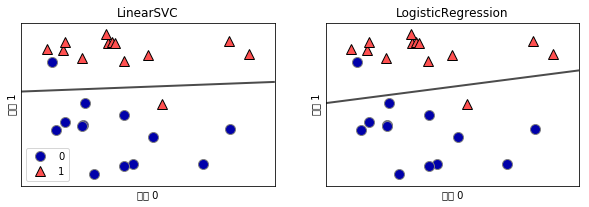

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

- 아래는 여러가지 규제에 대해서 결정경계를 그렸다
- 오른쪽 모델일수록 과적합된 것

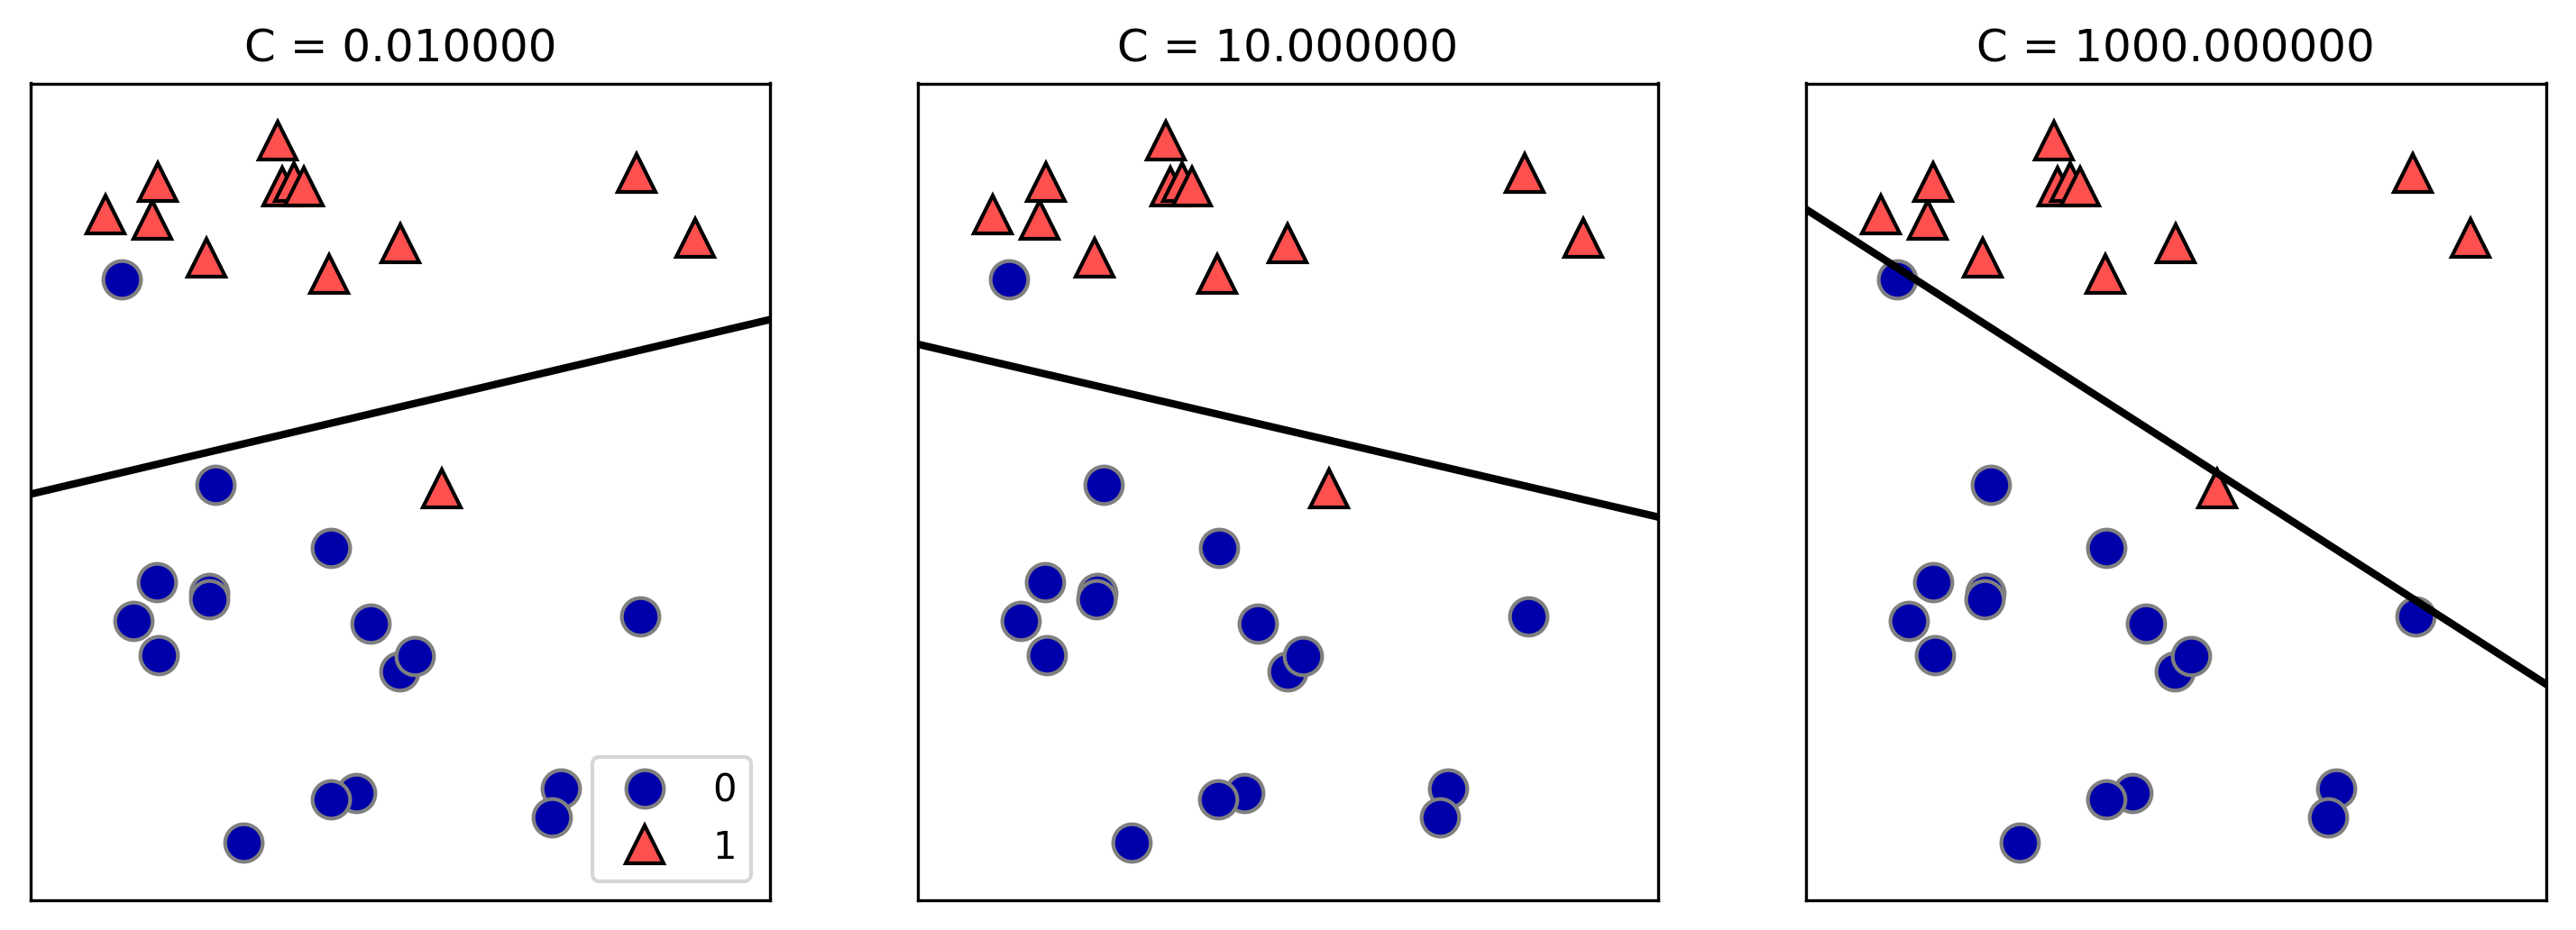

In [3]:
mglearn.plots.plot_linear_svc_regularization()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


- 훈련데이터와 테스트데이터 결과가 비슷하다는 것의 의미는 아직 모델을 더 정교하게 만들 여지가 있다는 뜻, 즉 과소적합이라는 뜻이다.
- C=100으로 하여 규제를 풀어주면

In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.972
테스트 세트 점수: 0.965


- C=0.01로 하여 규제를 더 강하게 하면

In [6]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


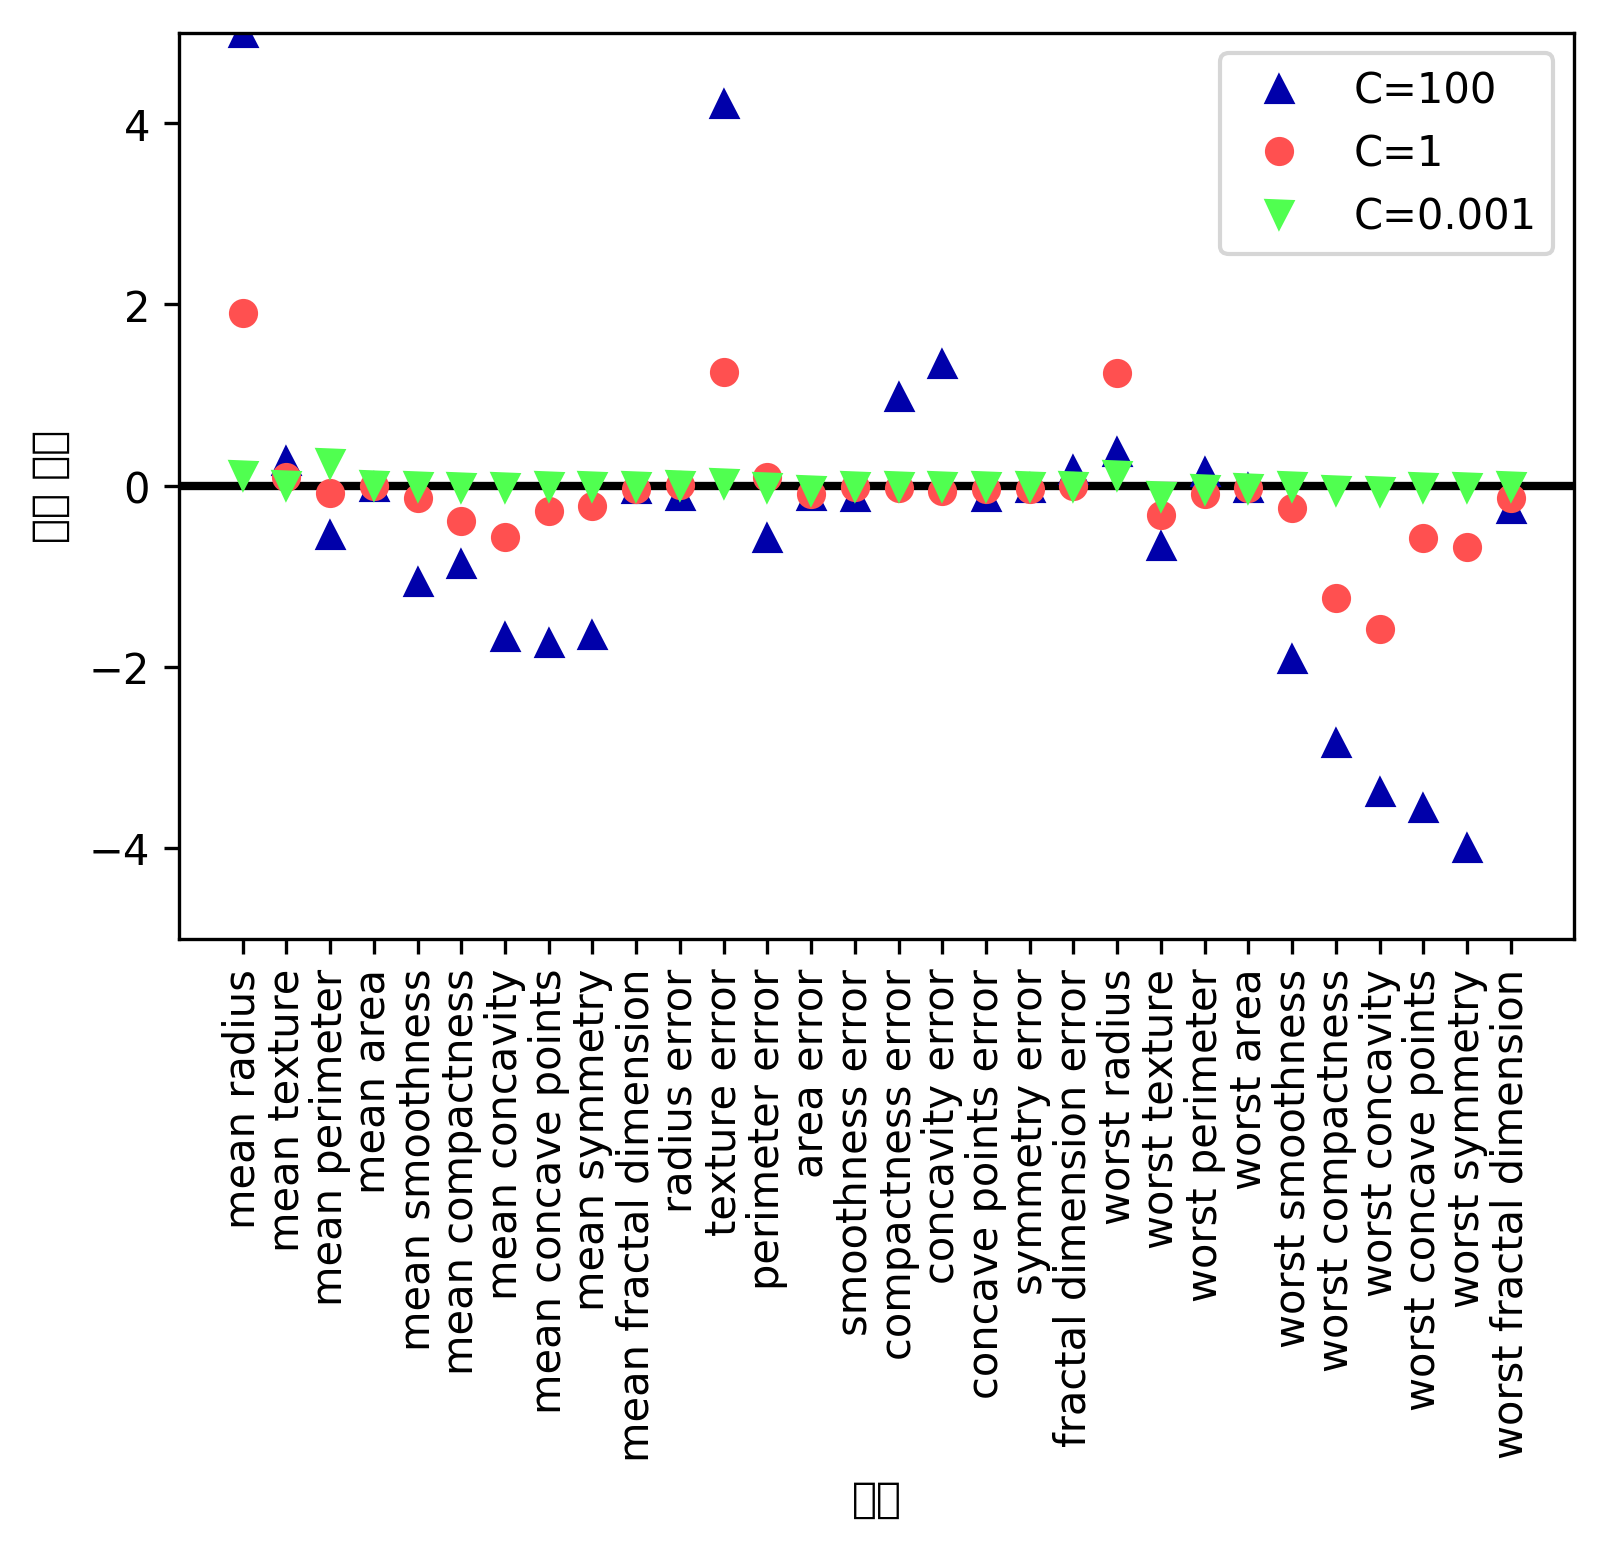

In [7]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


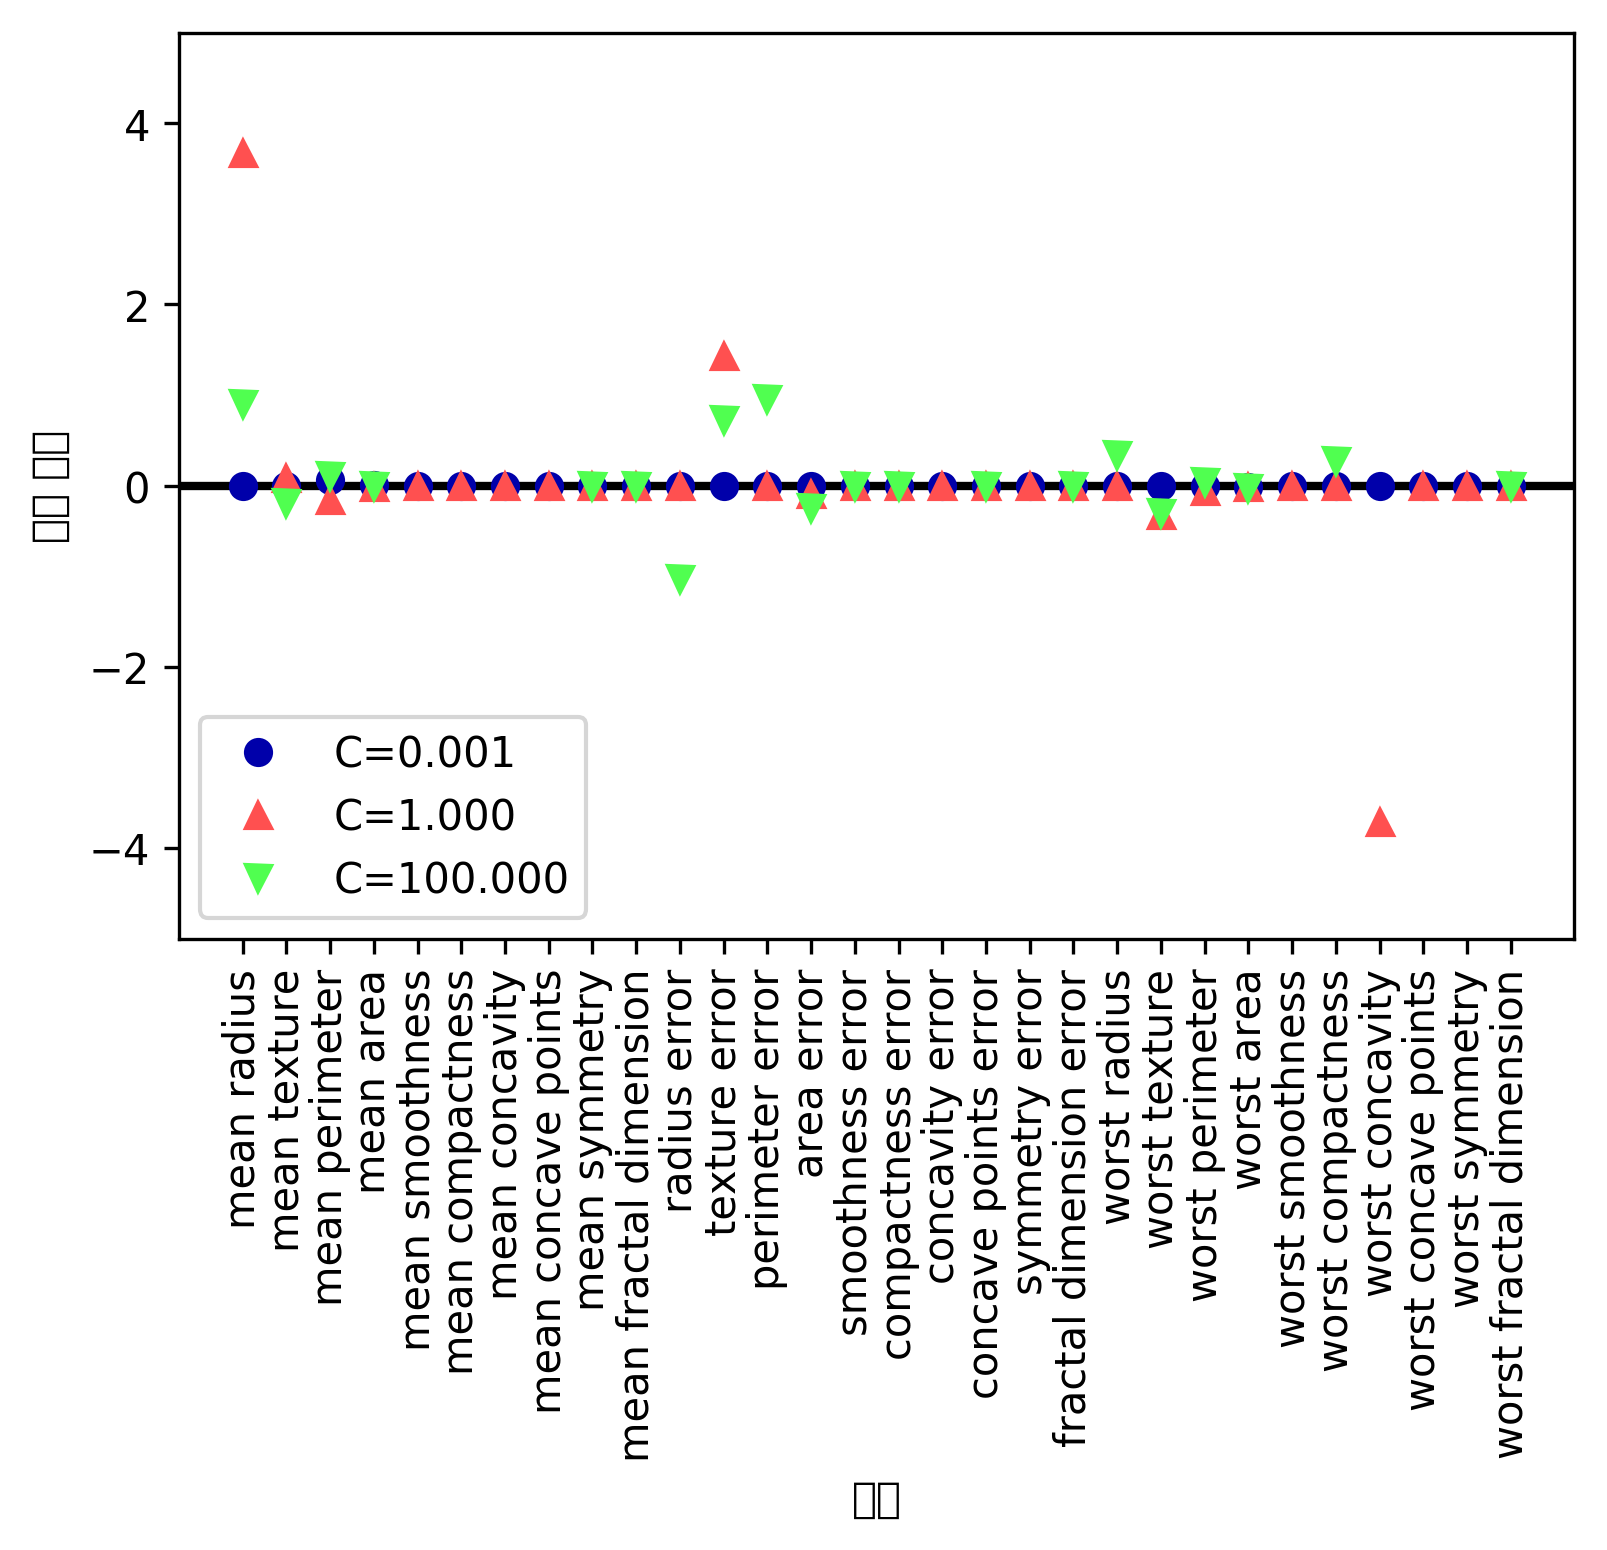

In [8]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류
- 대부분의 선형분류기는 이진 분류만 가능하다 (로지스틱회귀는 제외)
- 보통 일대다(one-to-rest)방법을 사용하는데, 한 클래스와 나머지 전체를 구분하는 이진 분류를 여러번 적용하는 방식이다.
- 아래는 세가지 클래스를 랜덤하게 만들어주는 make_blobs()를 사용해 데이터를 생성했다

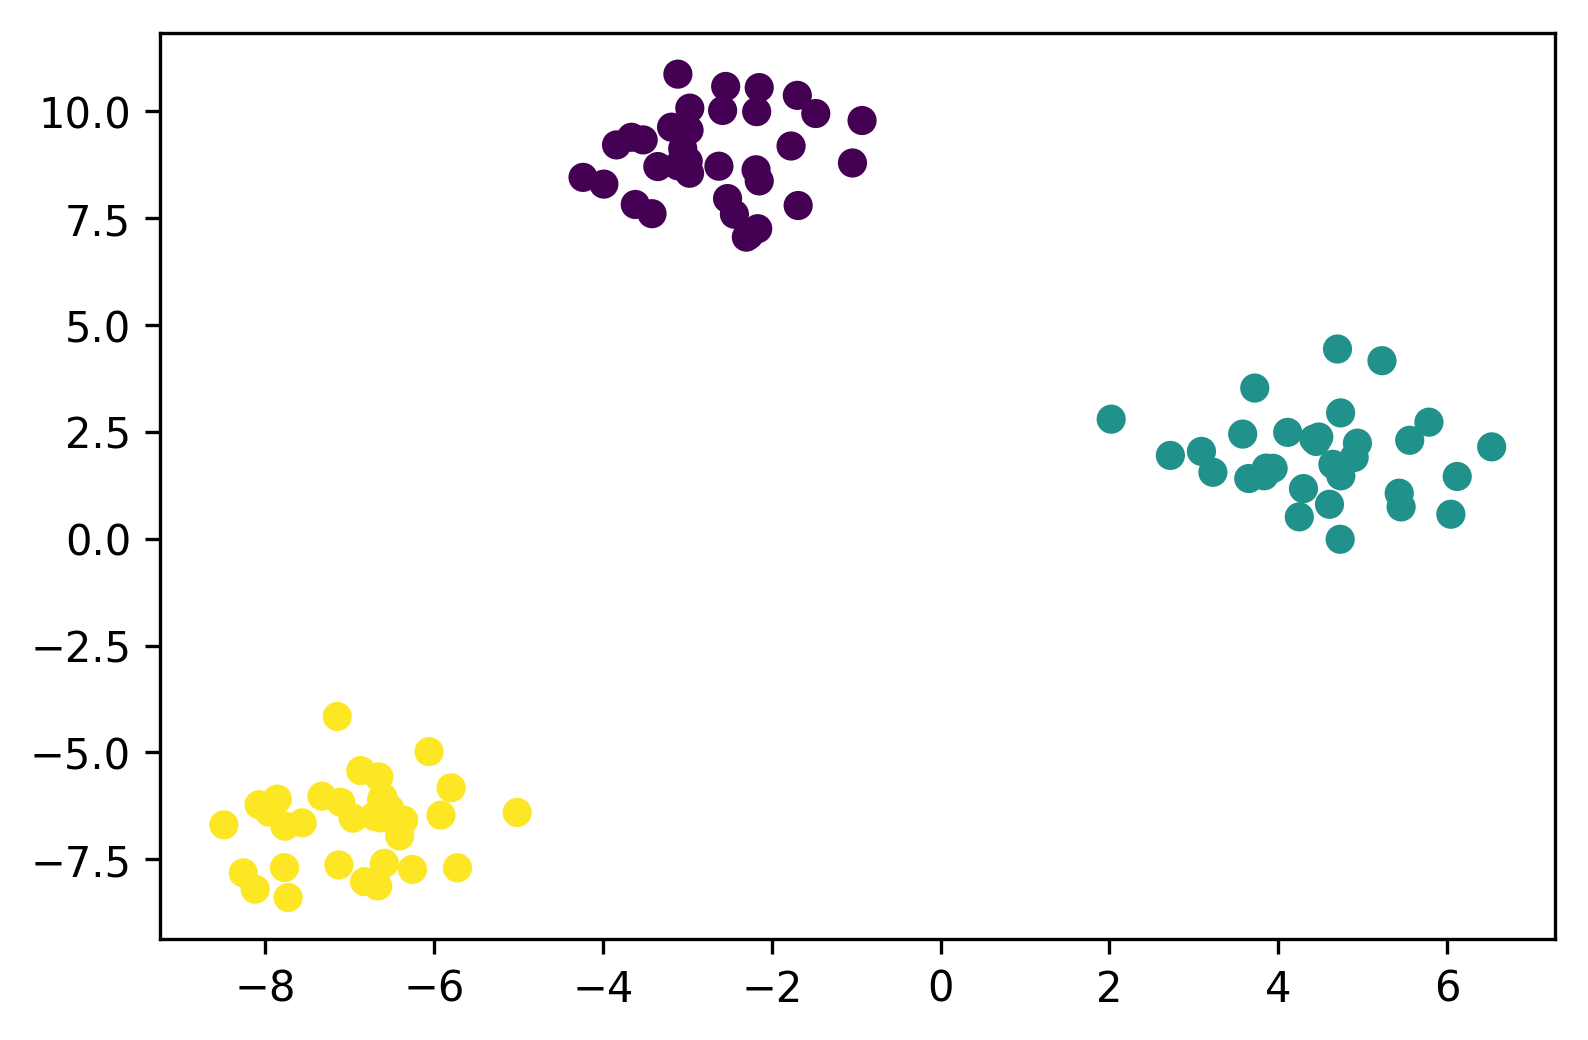

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

-  보기 좋게 다시 그렸다

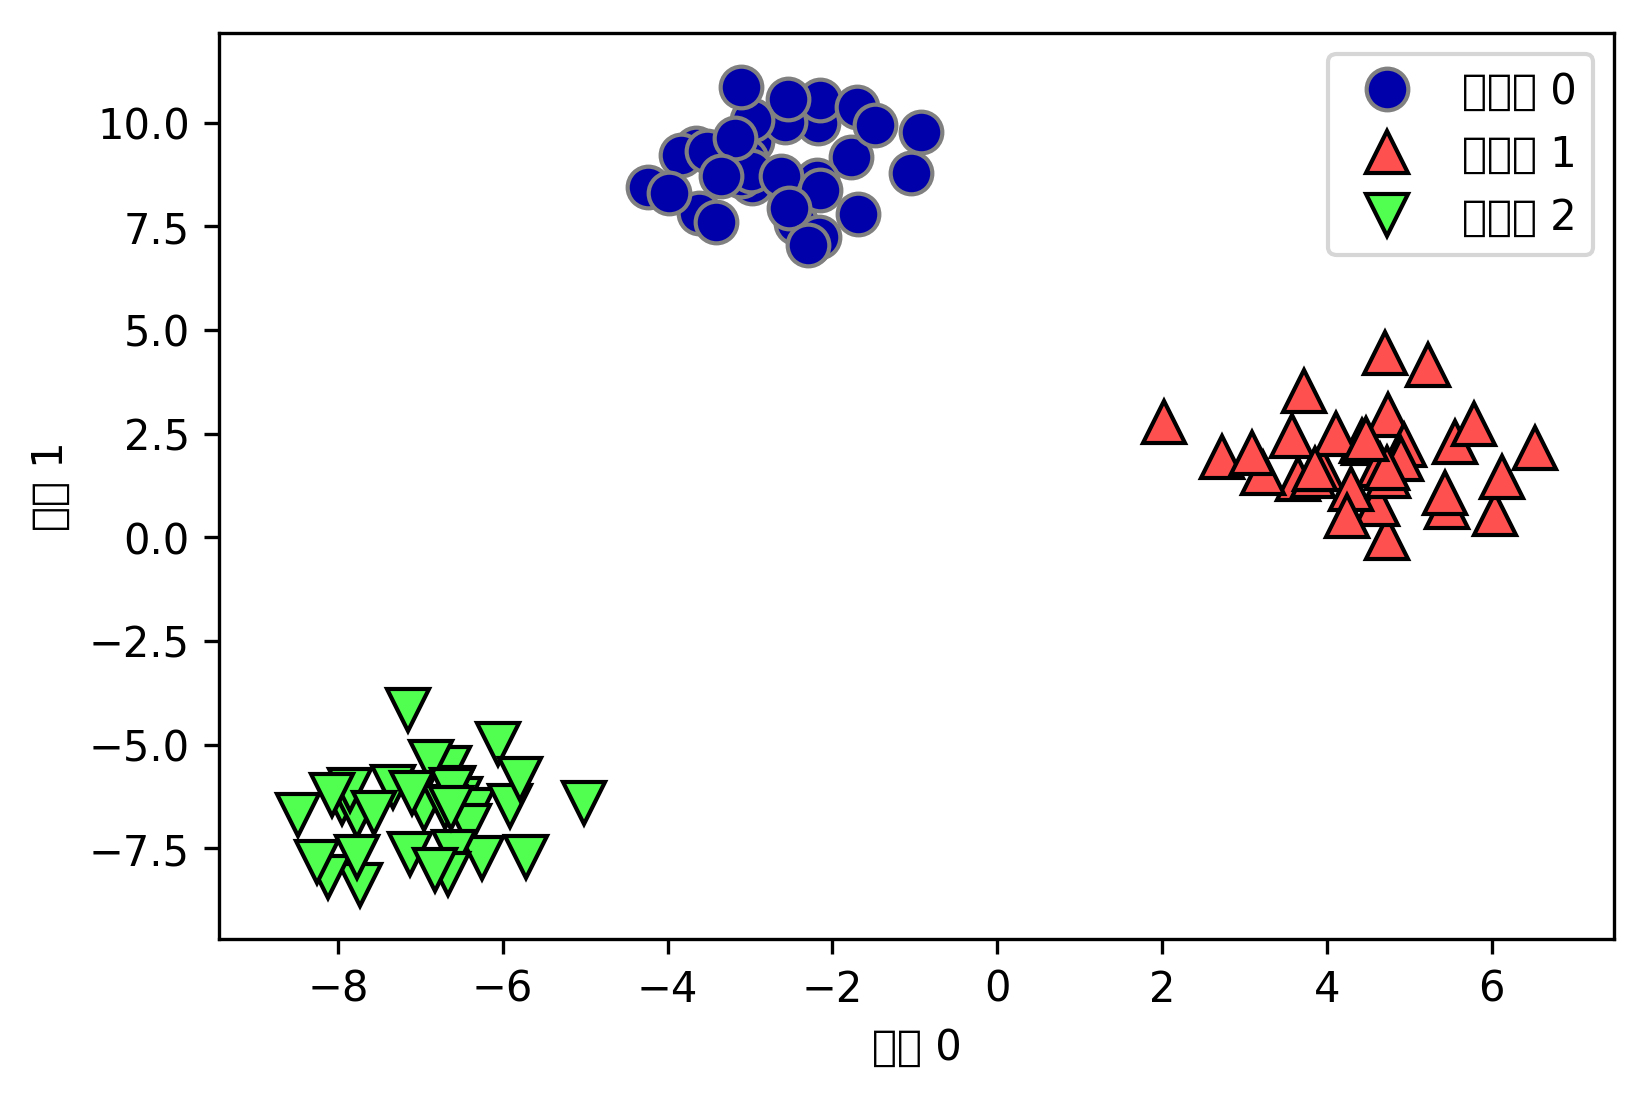

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

- LinearSVC 사용하여 분류기를 만든다. 분류경계를 3 세트 만든다 (클래스가 3개 이므로)

In [11]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


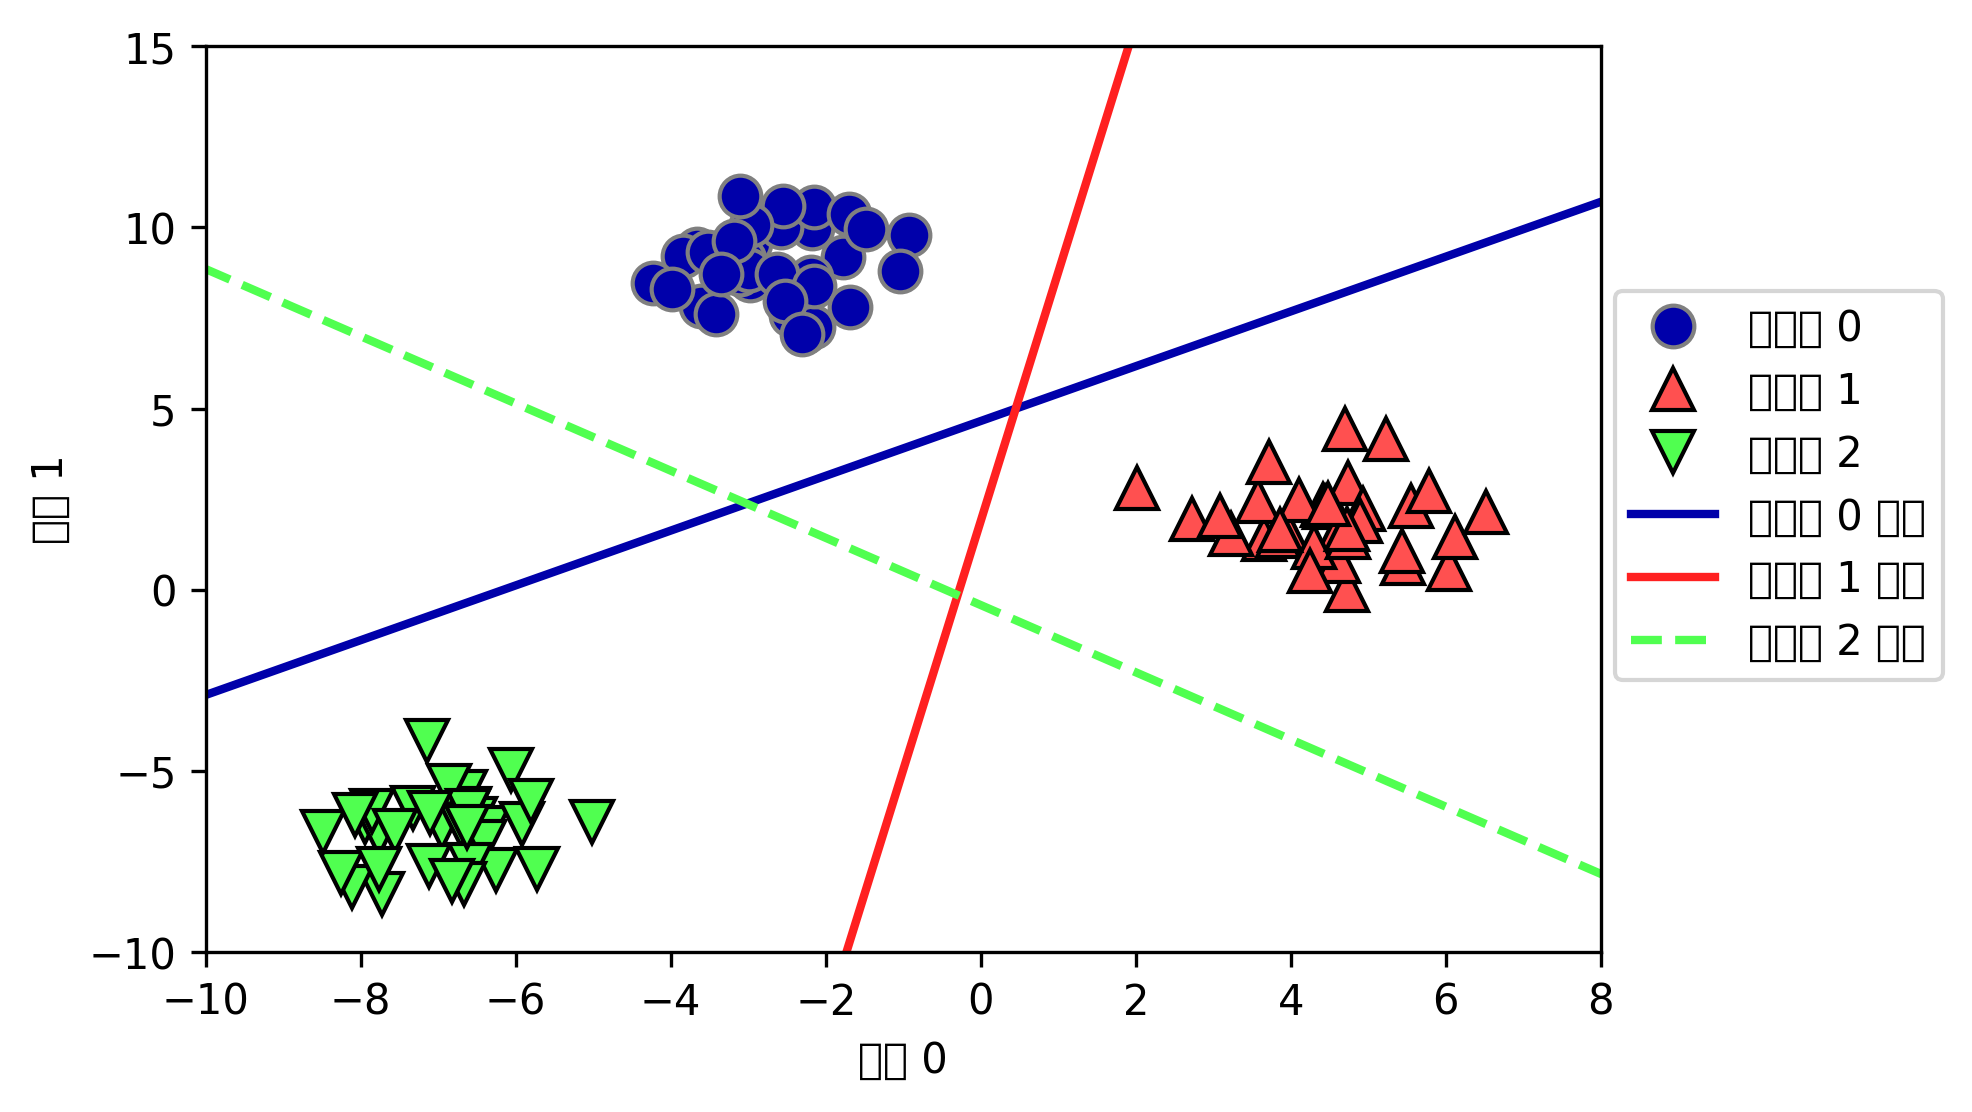

In [12]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))

- 위에서 가운데 삼각형 부분에 들어오는 샘플은 무엇으로 분류할까? (현재는 어디도 속하지 않은 곳)
- 결정경계를 보기 쉽게 색으로 표현해보았다
- plot_2d_classification 라는 함수는 분류 동작을 확인하기 위해서 임의로 만든 함수이다.

Text(0,0.5,'특성 1')

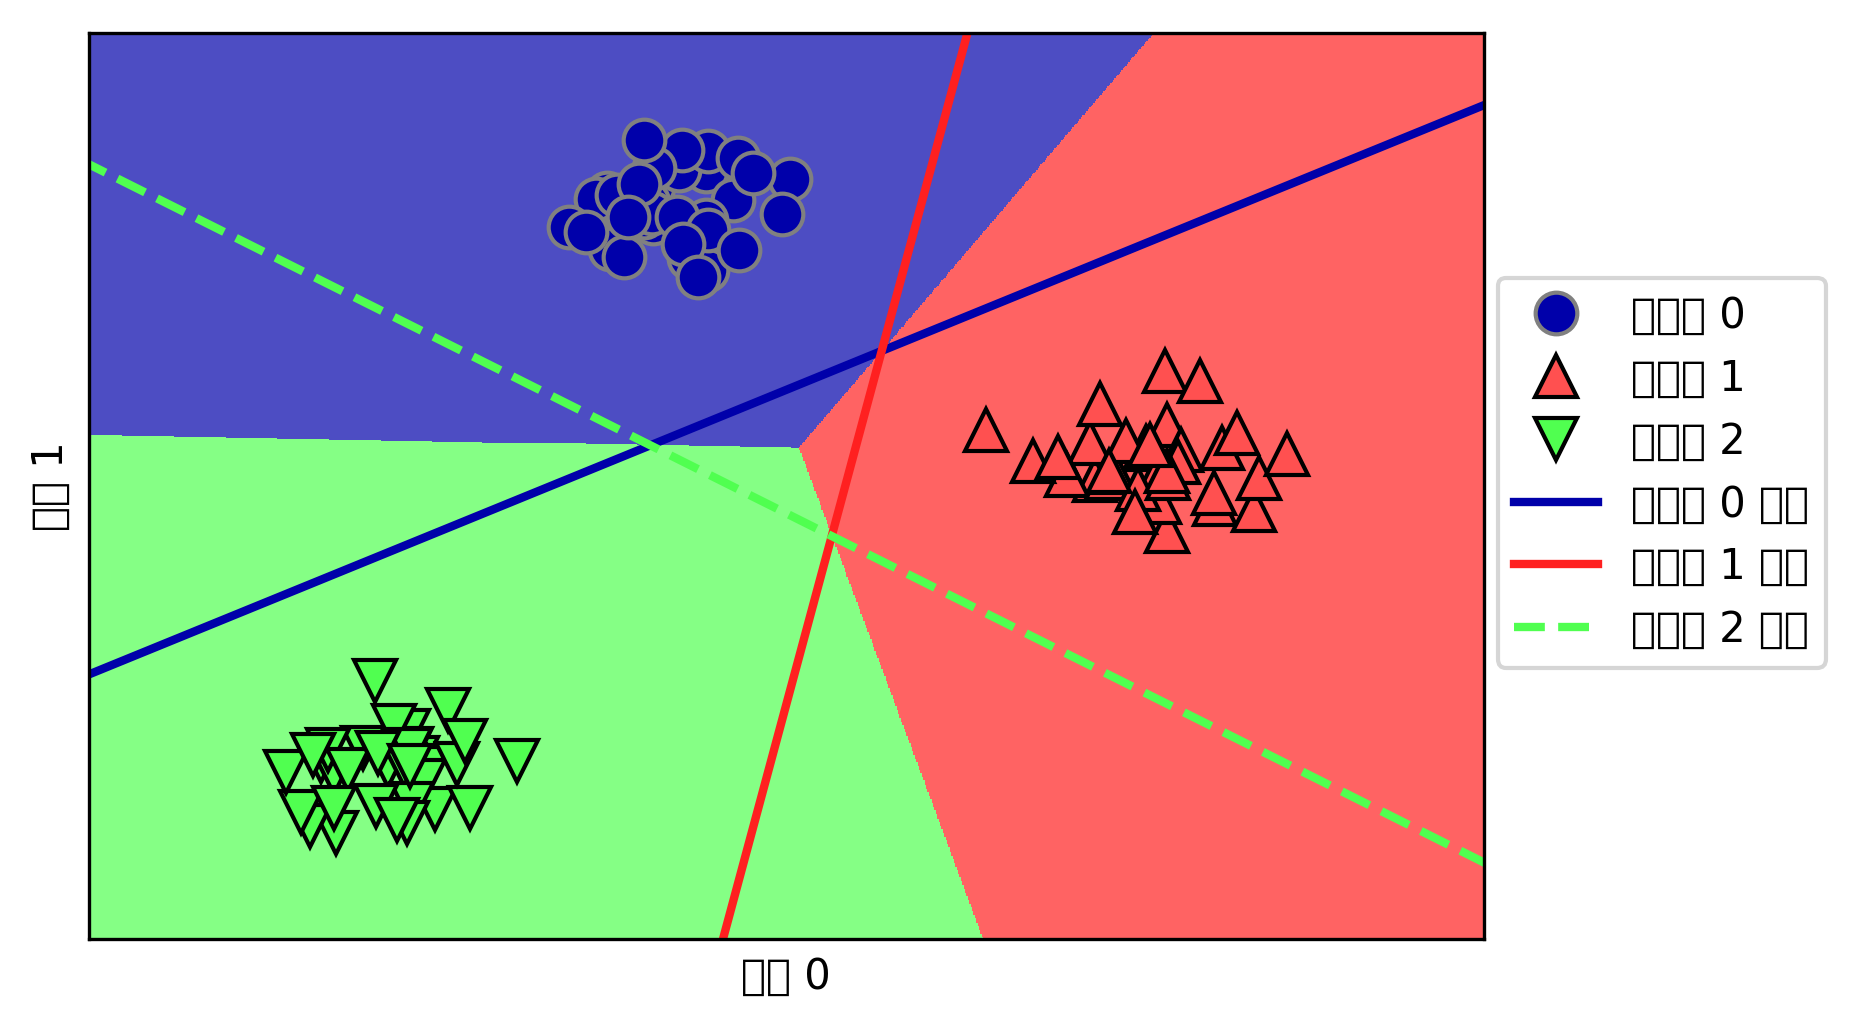

In [13]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 하이퍼 파라미터 선정
- 규제화는 알파가 클수록, C가 작을수록 커진다. 일반화에 가깝게 된다
- 이 값은 보통 로그 스케일로 변경해 본다
- 특성의 수를 줄이고 싶으면 L1 규제를 가한다

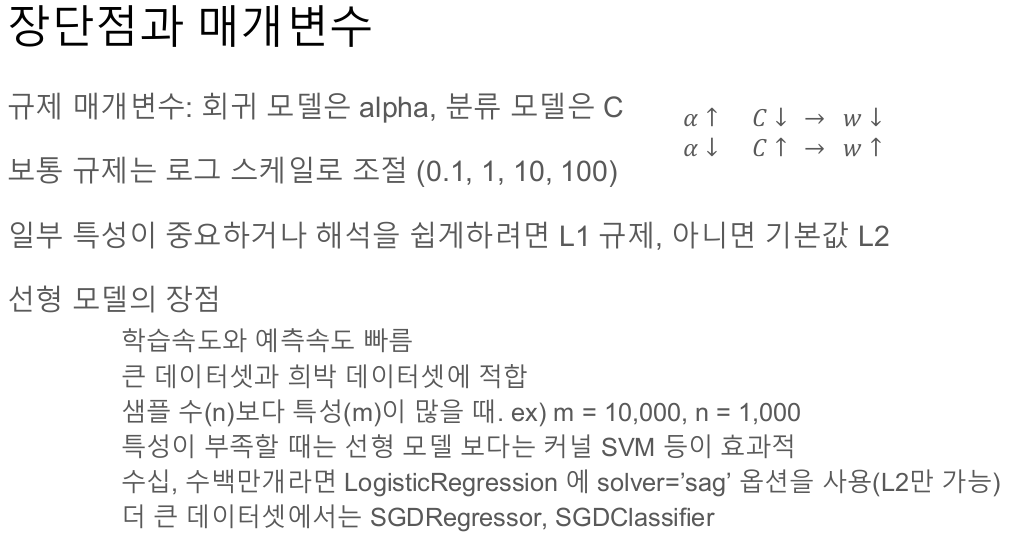